In [2]:
#!pip install xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
#import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle




In [3]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.drop(['isFlaggedFraud'],axis=1,inplace=True)


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [10]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [13]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
numeric_df.corr()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


In [14]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 485.4+ MB


In [15]:
le=LabelEncoder()
df['nameOrig']=le.fit_transform(df['nameOrig'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 485.4+ MB


In [16]:
le=LabelEncoder()
df['nameDest']=le.fit_transform(df['nameDest'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(5)
memory usage: 485.4 MB


<Axes: >

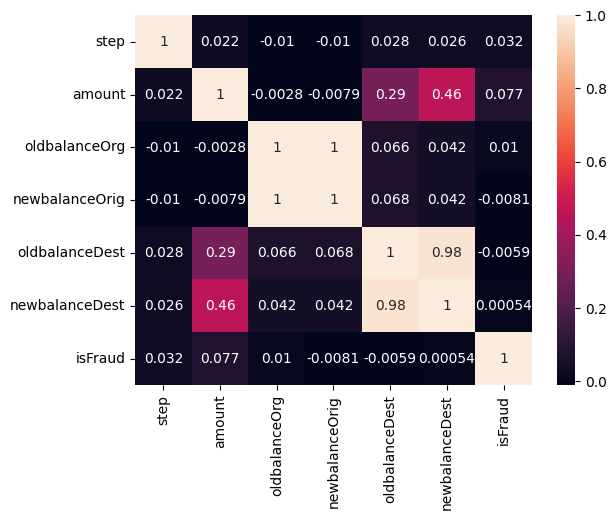

In [17]:
sns.heatmap(numeric_df.corr(),annot=True)

<Axes: xlabel='step', ylabel='Count'>

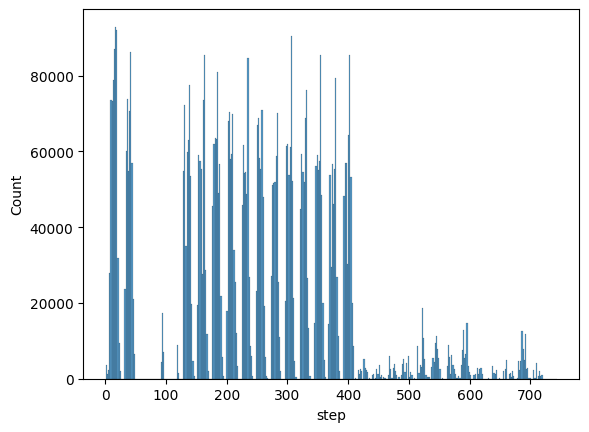

In [18]:
sns.histplot(data=df,x='step')

<Axes: xlabel='step'>

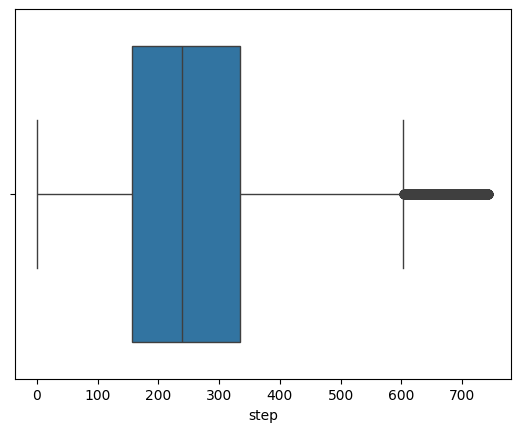

In [19]:
sns.boxplot(data=df,x='step')

<Axes: xlabel='type', ylabel='count'>

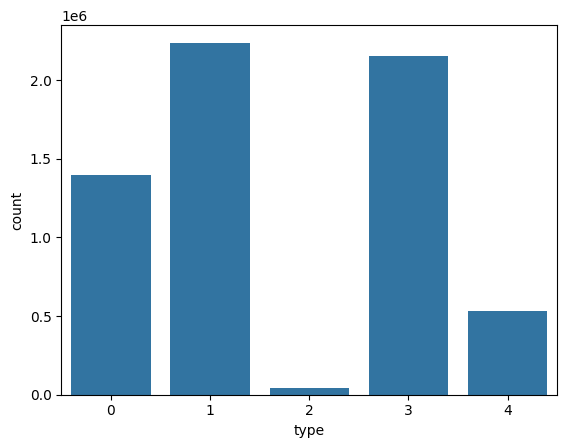

In [20]:
sns.countplot(data=df,x='type')

<Axes: xlabel='amount', ylabel='Count'>

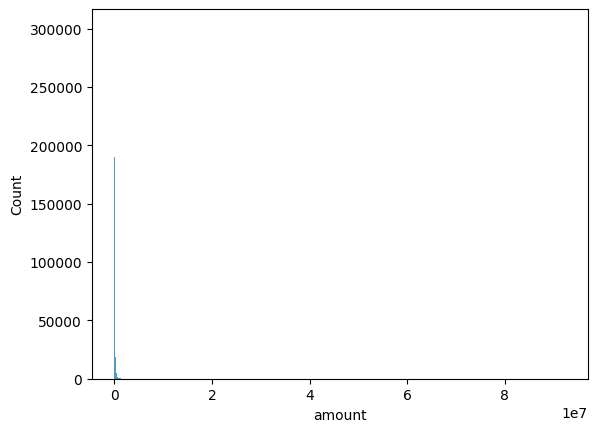

In [21]:
sns.histplot(data=df,x='amount')

<Axes: xlabel='amount'>

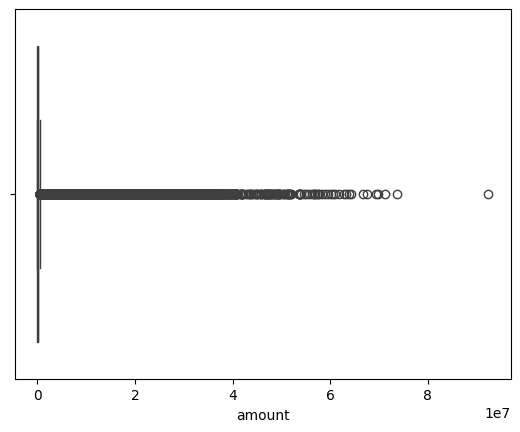

In [22]:
sns.boxplot(data=df,x='amount')

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

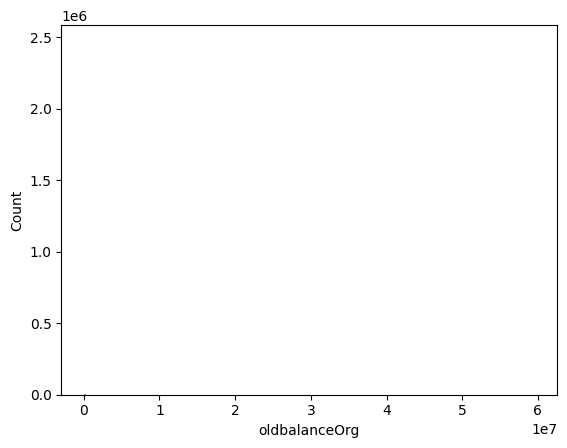

In [23]:
sns.histplot(data=df,x='oldbalanceOrg')

In [24]:
df['nameDest'].value_counts()

nameDest
84652     113
567820    109
472721    105
320660    102
349730    101
         ... 
14722       1
331157      1
325590      1
8227        1
74402       1
Name: count, Length: 2722362, dtype: int64

<Axes: xlabel='oldbalanceDest'>

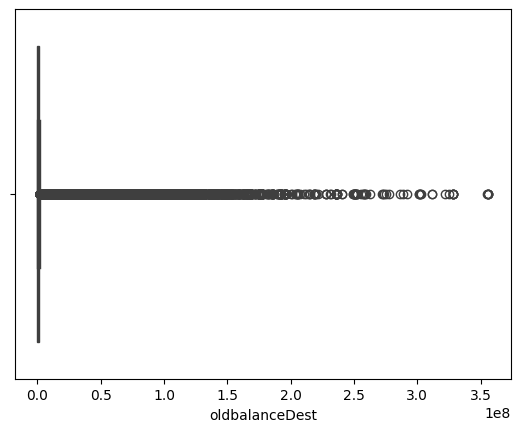

In [25]:
sns.boxplot(data=df,x='oldbalanceDest')

<Axes: xlabel='newbalanceDest'>

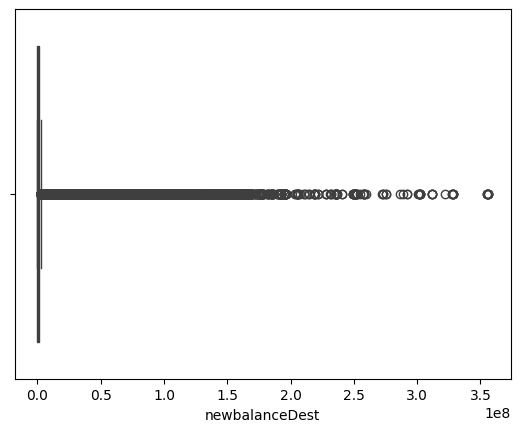

In [26]:
sns.boxplot(data=df,x='newbalanceDest')

<Axes: xlabel='isFraud', ylabel='count'>

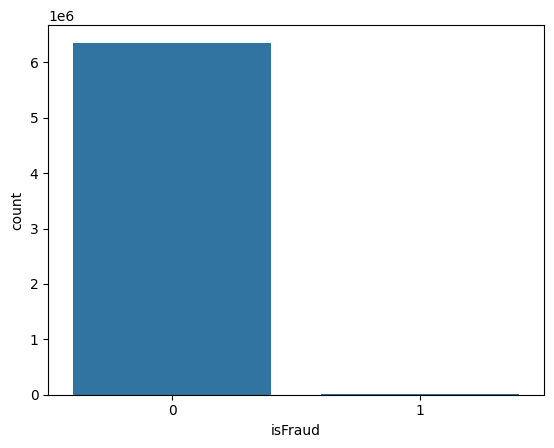

In [27]:
sns.countplot(data=df,x='isFraud')

In [28]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [29]:
df.loc[df['isFraud']==0,'isFraud']='is not Fraud'
df.loc[df['isFraud']==1,'isFraud']='is Fraud'

C:\Users\Thanuja\AppData\Local\Temp\ipykernel_4684\1531064434.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'is not Fraud' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['isFraud']==0,'isFraud']='is not Fraud'


In [30]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,is not Fraud
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,is not Fraud
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,is Fraud
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,is Fraud
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,is not Fraud
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,is Fraud
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,is Fraud
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,is Fraud
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,is Fraud


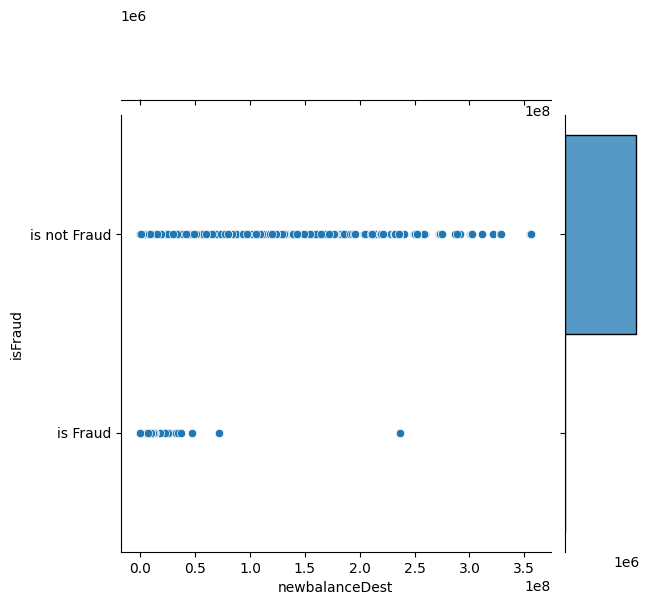

In [31]:
sns.jointplot(data=df,x='newbalanceDest',y='isFraud')

<Axes: xlabel='type', ylabel='count'>

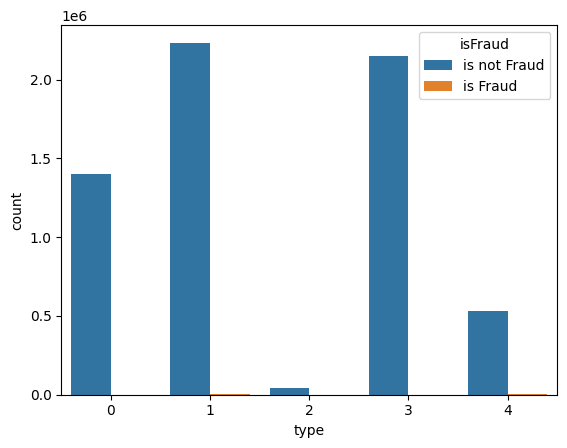

In [32]:
sns.countplot(data=df,x='type',hue='isFraud')

<Axes: xlabel='isFraud', ylabel='step'>

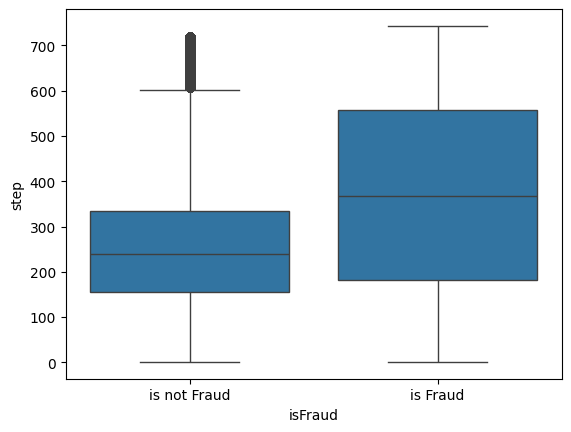

In [33]:
sns.boxplot(data=df,x='isFraud',y='step')

<Axes: xlabel='isFraud', ylabel='amount'>

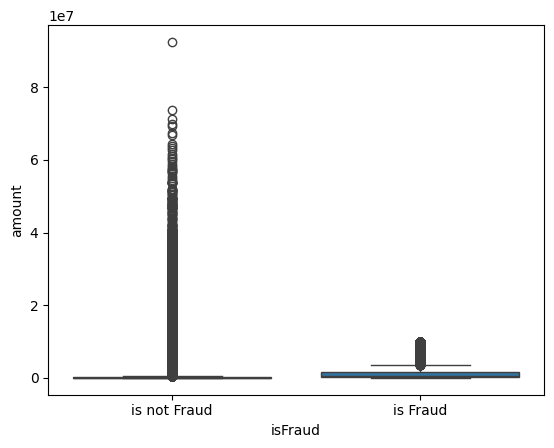

In [34]:
sns.boxplot(data=df,x='isFraud',y='amount')

<Axes: xlabel='isFraud', ylabel='oldbalanceOrg'>

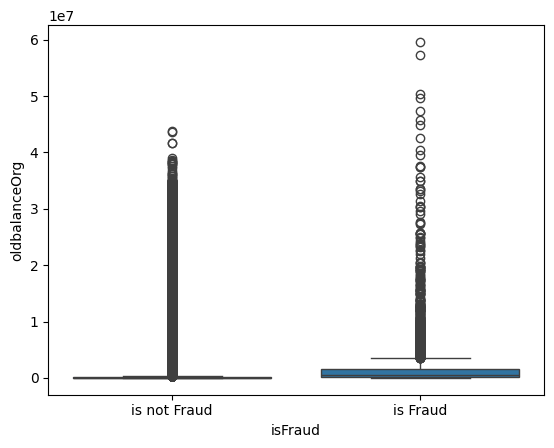

In [35]:
sns.boxplot(data=df,x='isFraud',y='oldbalanceOrg')

<Axes: xlabel='isFraud', ylabel='newbalanceOrig'>

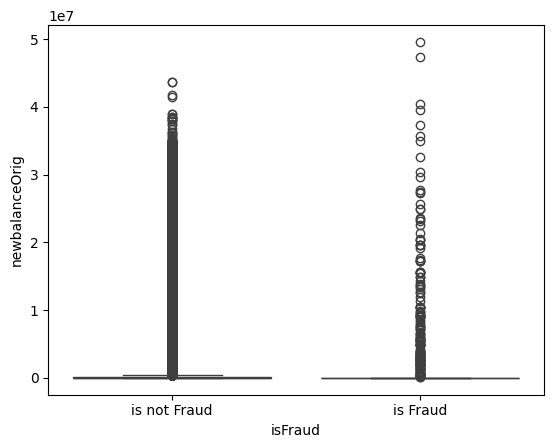

In [36]:
sns.boxplot(data=df,x='isFraud',y='newbalanceOrig')

<Axes: xlabel='isFraud', ylabel='oldbalanceDest'>

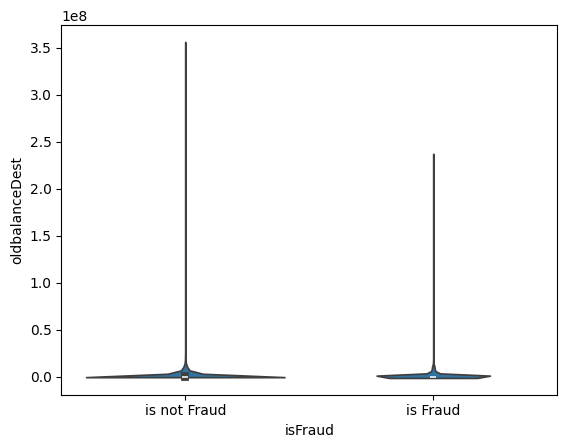

In [37]:
sns.violinplot(data=df,x='isFraud',y='oldbalanceDest')

<Axes: xlabel='isFraud', ylabel='newbalanceDest'>

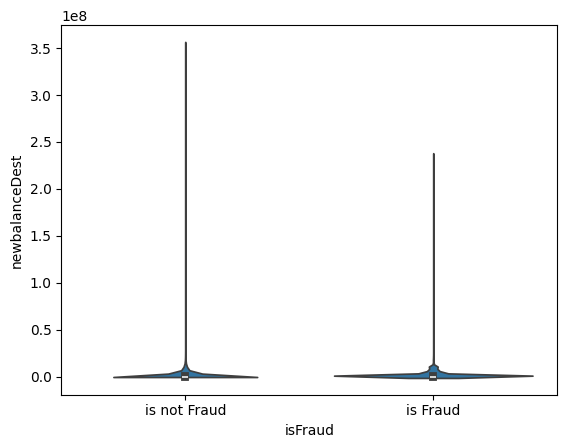

In [38]:
sns.violinplot(data=df,x='isFraud',y='newbalanceDest')

In [39]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6362620
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,is not Fraud
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6354407
mean,2.433972e+02,1.714150e+00,1.798619e+05,3.176678e+06,8.338831e+05,8.551137e+05,7.464270e+05,1.100702e+06,1.224996e+06,NaN
std,1.423320e+02,1.350117e+00,6.038582e+05,1.834064e+06,2.888243e+06,2.924049e+06,7.502455e+05,3.399180e+06,3.674129e+06,NaN
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,1.560000e+02,1.000000e+00,1.338957e+04,1.588332e+06,0.000000e+00,0.000000e+00,2.168950e+05,0.000000e+00,0.000000e+00,NaN
50%,2.390000e+02,1.000000e+00,7.487194e+04,3.176672e+06,1.420800e+04,0.000000e+00,4.322890e+05,1.327057e+05,2.146614e+05,NaN
75%,3.350000e+02,3.000000e+00,2.087215e+05,4.765048e+06,1.073152e+05,1.442584e+05,1.132509e+06,9.430367e+05,1.111909e+06,NaN


<Axes: ylabel='amount'>

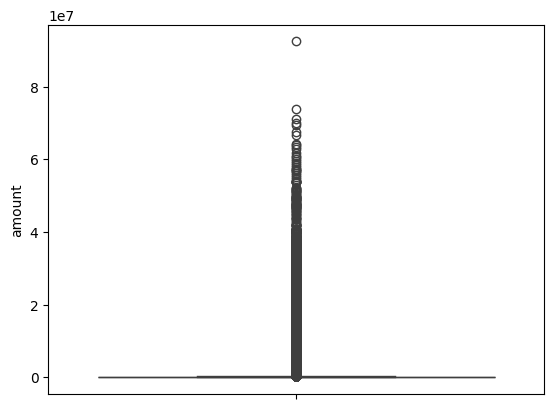

In [40]:

sns.boxplot(df['amount'])

In [41]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [42]:
q1=np.quantile(df['amount'],0.25)
q3=np.quantile(df['amount'],0.75)
IQR=q3-q1
upper_bound=q3+(1.5*IQR)
lower_bound=q1-(1.5*IQR)
print('q1:',q1)
print('q3:',q3)
print('IQR:',IQR)
print('Upper Bound:',upper_bound)
print('Lower Bound:',lower_bound)
print('Skewed data:',len(df[df['amount']>upper_bound]))
print('Skewed data:',len(df[df['amount']<lower_bound]))

q1: 13389.57
q3: 208721.4775
IQR: 195331.9075
Upper Bound: 501719.33875
Lower Bound: -279608.29125
Skewed data: 338078
Skewed data: 0


In [43]:
def transformationPlot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  # Handle potential infinite values
  sns.distplot(feature[np.isfinite(feature)])
  plt.subplot(1,2,2)
  stats.probplot(feature[np.isfinite(feature)], plot=plt)

C:\Users\Thanuja\AppData\Local\Temp\ipykernel_4684\619918172.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature[np.isfinite(feature)])


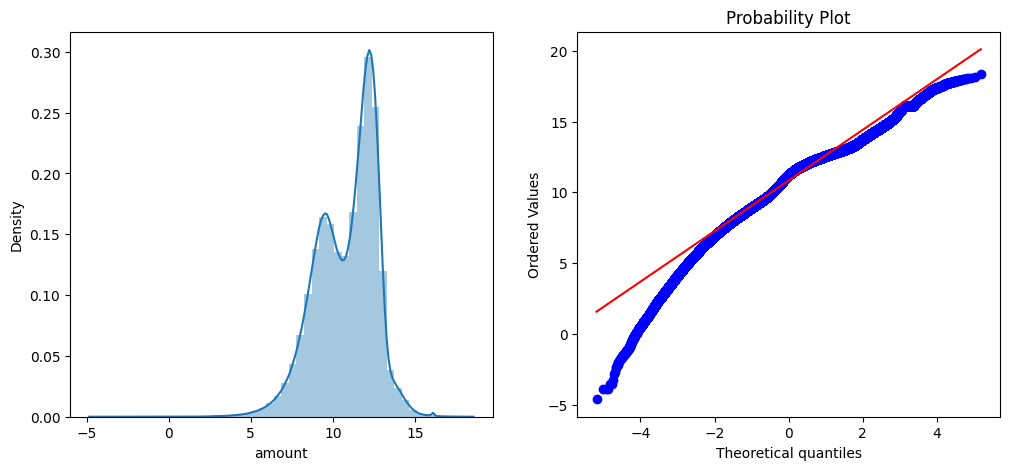

In [44]:

positive_amounts = df['amount'][df['amount'] > 0]
transformationPlot(np.log(positive_amounts))

In [45]:
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [46]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [47]:
df=df.drop(['nameOrig','nameDest'],axis=1)

In [48]:
x=df.drop('isFraud',axis=1)
y=df['isFraud']

In [49]:
x.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')

In [50]:
y

0          is not Fraud
1          is not Fraud
2              is Fraud
3              is Fraud
4          is not Fraud
               ...     
6362615        is Fraud
6362616        is Fraud
6362617        is Fraud
6362618        is Fraud
6362619        is Fraud
Name: isFraud, Length: 6362620, dtype: object

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 7)
(1272524, 7)
(5090096,)
(1272524,)


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [54]:
'''rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_test_predict1=rfc.predict(x_test)'''


'rfc=RandomForestClassifier()\nrfc.fit(x_train,y_train)\ny_test_predict1=rfc.predict(x_test)'

In [55]:
'''test_accuracy=accuracy_score(y_test,y_test_predict1)
print(test_accuracy)'''

'test_accuracy=accuracy_score(y_test,y_test_predict1)\nprint(test_accuracy)'

In [56]:
'''y_train_predict1=rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy'''

'y_train_predict1=rfc.predict(x_train)\ntrain_accuracy=accuracy_score(y_train,y_train_predict1)\ntrain_accuracy'

In [57]:
'''pd.crosstab(y_test,y_test_predict1)'''

'pd.crosstab(y_test,y_test_predict1)'

In [58]:
'''print(classification_report(y_test,y_test_predict1))'''

'print(classification_report(y_test,y_test_predict1))'

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_test_predict2=dtc.predict(x_test)


In [60]:
test_accuracy=accuracy_score(y_test,y_test_predict2)
test_accuracy

0.9997005950378932

In [61]:
y_train_predict2=dtc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict2)
train_accuracy

1.0

In [62]:
pd.crosstab(y_test,y_test_predict2)

col_0,is Fraud,is not Fraud
isFraud,,
is Fraud,1437,204
is not Fraud,177,1270706


In [63]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

    is Fraud       0.89      0.88      0.88      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [65]:
'''from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3=etc.predict(x_test)'''

'from sklearn.ensemble import ExtraTreesClassifier\netc=ExtraTreesClassifier()\netc.fit(x_train,y_train)\ny_test_predict3=etc.predict(x_test)'

In [66]:
'''test_accuracy=accuracy_score(y_test,y_test_predict3)
test_accuracy'''

'test_accuracy=accuracy_score(y_test,y_test_predict3)\ntest_accuracy'

In [67]:
'''y_train_predict3=etc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict3)
train_accuracy'''

'y_train_predict3=etc.predict(x_train)\ntrain_accuracy=accuracy_score(y_train,y_train_predict3)\ntrain_accuracy'

In [68]:
'''pd.crosstab(y_test,y_test_predict3)'''

'pd.crosstab(y_test,y_test_predict3)'

In [69]:
'''print(classification_report(y_test,y_test_predict3))'''

'print(classification_report(y_test,y_test_predict3))'

In [70]:
#df.columns

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train1=le.fit_transform(y_train)


In [72]:
y_test1=le.transform(y_test)

In [73]:
y_test1

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
y_train1

array([1, 1, 1, ..., 1, 1, 1])

In [75]:
'''import xgboost as xgb
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)
y_test_predict5=xgb1.predict(x_test)'''

'import xgboost as xgb\nxgb1=xgb.XGBClassifier()\nxgb1.fit(x_train,y_train1)\ny_test_predict5=xgb1.predict(x_test)'

In [76]:
'''test_accuracy=accuracy_score(y_test1,y_test_predict5)
test_accuracy'''

'test_accuracy=accuracy_score(y_test1,y_test_predict5)\ntest_accuracy'

In [77]:
'''y_train_predict5=xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy'''

'y_train_predict5=xgb1.predict(x_train)\ntrain_accuracy=accuracy_score(y_train1,y_train_predict5)\ntrain_accuracy'

In [78]:
'''pd.crosstab(y_test1,y_test_predict5)'''

'pd.crosstab(y_test1,y_test_predict5)'

In [79]:
'''from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))'''

'from sklearn.metrics import classification_report,confusion_matrix\nprint(classification_report(y_test1,y_test_predict5))'

In [80]:
import pickle
pickle.dump(dtc,open('model.pkl','wb'))

In [ ]:
#from google.colab import files
#files.download('model.pkl')

: 